In [33]:
#Import the libraries that contains the necessary functions for the problem
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Seems that I'm having trouble loading the spreadsheet file so an additional fix will be applied ###

In [35]:
#Change the directory path
new_path = r"C:\Users\PC\Documents\Python Codes\Modules\Incentives\Top Spotify Music Incentives\spotify-2023.csv"

In [36]:
#load the spreadsheet file
data = pd.read_csv(new_path, encoding='cp1252')

# Overview of Dataset #
- Determine the number of rows and columns that the dataset contain

In [38]:
#Use .shape to get number of row and column respectively and assign their values to a variable
row_count, column_count = data.shape

#print
print("The dataset has " + str(row_count) + " rows and " + str(column_count) + " columns.")

The dataset has 953 rows and 24 columns.


- What are the data types of each column?

In [40]:
#Use .dtype to print the data type of each column
print(data.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


- Are there any missing values?

In [42]:
print(data.isnull().values.any()) #This line of code will print True if it finds at least one entry with missing value

True


In [43]:
print("Columns with missing values:")
# Check for missing values in each column
print(data.isnull().sum()) #The values that will be printed indicates the number of entries with missing values of that specific column

Columns with missing values:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


#### From this point on, I'll be using the cleaned data ####

In [45]:
#load the cleaned spreadsheet file
newer_path = r"C:\Users\PC\Documents\Python Codes\Modules\Incentives\Top Spotify Music Incentives\Spotify_2023_(Cleaned).csv"

cleaned_data = pd.read_csv(newer_path, encoding='cp1252')

In [46]:
# Use .shape to get number of rows and columns respectively and assign their values to a variable
cleaned_row_count, cleaned_column_count = cleaned_data.shape

In [47]:
# Use .dtype to print the data type of each column
print(cleaned_data.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [48]:
print(cleaned_data.isnull().values.any())  # Will print True if it finds at least one entry with a missing value

False


In [49]:
print("Columns with missing values:")
# Check for missing values in each column
print(cleaned_data.isnull().sum())  # The values that will be printed indicates the number of entries with missing values in that specific column
print("The dataset has " + str(cleaned_row_count) + " rows and " + str(cleaned_column_count) + " columns.") #Display the number of rows and columns for the new and cleaned data set

Columns with missing values:
track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64
The dataset has 949 rows and 24 columns.


**The cleaned data set lost 4 rows as a result of removing the ~~duplicate songs~~**

# Basic Descriptive Statistics #
**Get the mean, median, and standard deviation of the stream column**

In [75]:
# Pick out the stream column
x = 'streams'

In [77]:
# Get mean, median, and standard deviation
mean_streams = cleaned_data[x].mean()
median_streams = cleaned_data[x].median()
standard_streams = cleaned_data[x].std()

In [79]:
print("Mean of " + x + ": " + str(mean_streams))

Mean of streams: 513476285.8651212


In [81]:
print("Median of " + x + ": " + str(median_streams))

Median of streams: 287278853.0


In [83]:
print("Standard Deviation of " + x + ": " + str(standard_streams))

Standard Deviation of streams: 567873302.7109758


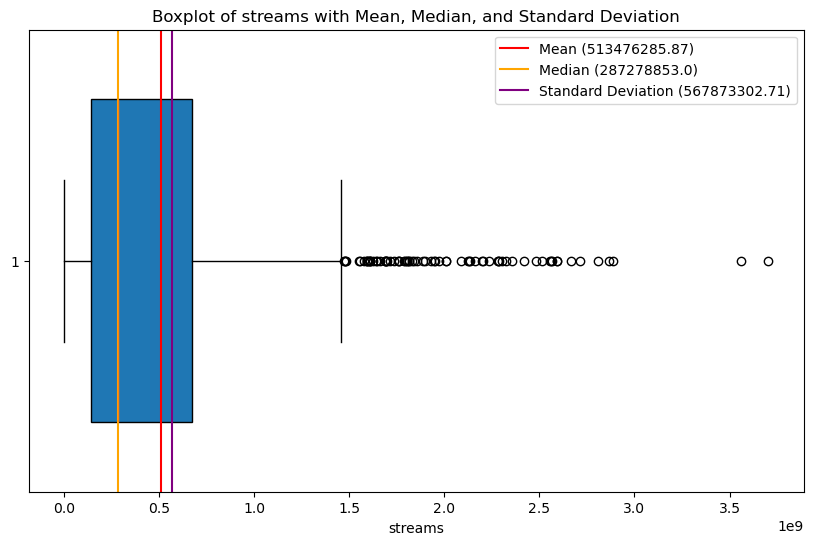

In [105]:
# Create a figure for the boxplot
plt.figure(figsize=(10, 6))

# Create a boxplot
plt.boxplot(cleaned_data[x], vert=False, widths=0.7, patch_artist=True)

# Add some vertical lines to pinpoint the mean, median, and standard deviation
plt.axvline(mean_streams, color='red', linestyle='-', label='Mean (' + str(round(mean_streams, 2)) + ')')

plt.axvline(median_streams, color='orange', linestyle='-', label='Median (' + str(round(median_streams, 2)) + ')')

plt.axvline(standard_streams, color='purple', linestyle='-', label='Standard Deviation (' + str(round(standard_streams, 2)) + ')')

# Add a legend to label the mean, median, and standard deviation lines
plt.legend()
plt.title('Boxplot of ' + x + ' with Mean, Median, and Standard Deviation')

# Label the x-axis
plt.xlabel(x)

# Display the plot
plt.show()